# Кластеризация. Домашнее задание

###### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)

In [2]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [79]:
data = pd.read_excel('geo_comment.xlsx')

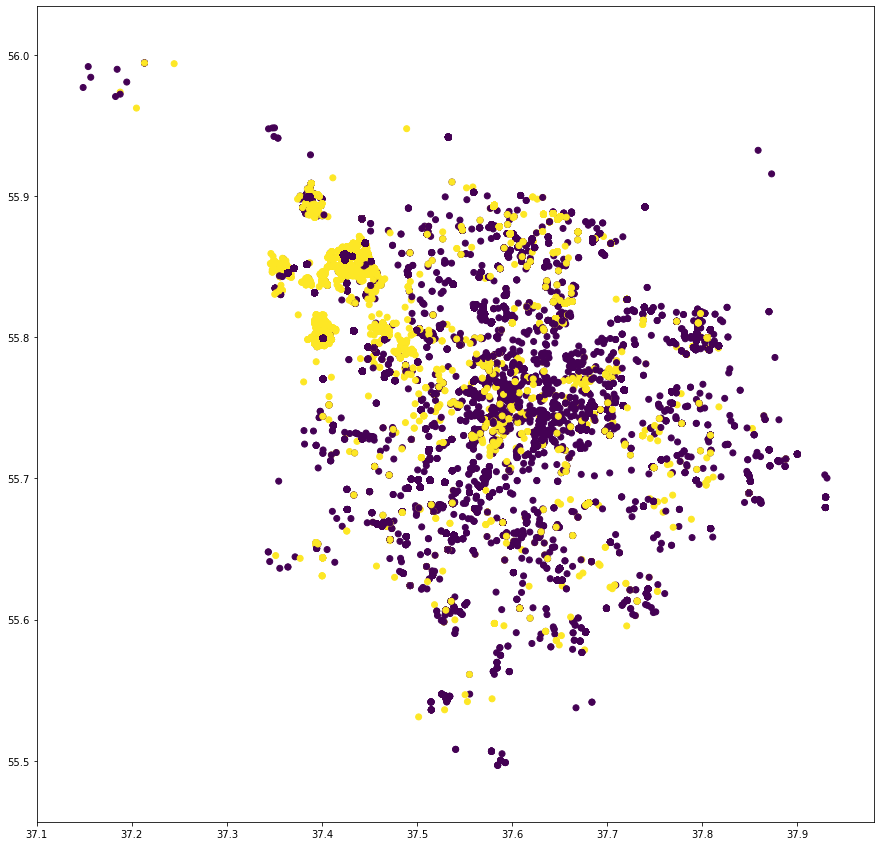

In [12]:
plt.scatter(data.x, data.y,c=data.comment_class)
plt.gcf().set_size_inches([15,15])

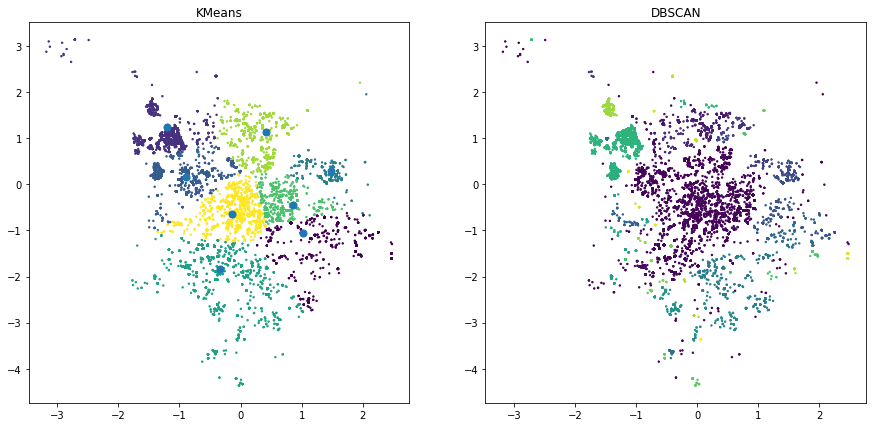

In [111]:
X = StandardScaler().fit_transform(data[['x','y']])
als = [KMeans,  DBSCAN]
l = len(als)
fig, axes = plt.subplots(1,l, figsize = [15, int(15 / l)])
for i in range(l):
    try:
        model = als[i](eps = 0.1)
    except:
        model = als[i]()
    y_pred = model.fit_predict(X)  
    axes[i].scatter(X[:,0], X[:,1], c=y_pred, s=2)
    axes[i].set_title(model.__class__.__name__)
    try:
        centers = model.cluster_centers_
        axes[i].scatter(centers[:, 0], centers[:, 1], s=50)
    except:
        _

* аналогично исследовать скопления голосов за и против отдельно

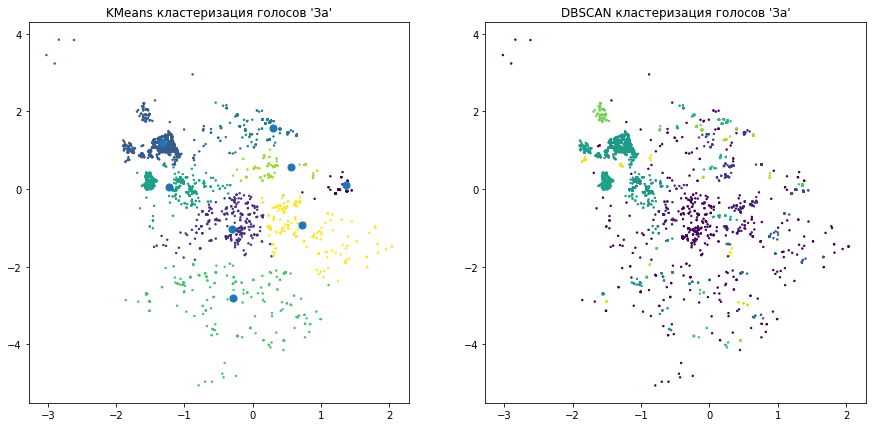

In [112]:
X = StandardScaler().fit_transform(data[data.comment_class == 1][['x','y']])
als = [KMeans,  DBSCAN]
l = len(als)
fig, axes = plt.subplots(1,l, figsize = [15, int(15 / l)])
for i in range(l):
    try:
        model = als[i](eps = 0.1)
    except:
        model = als[i]()
    y_pred = model.fit_predict(X)  
    axes[i].scatter(X[:,0], X[:,1], c=y_pred, s=2)
    axes[i].set_title(model.__class__.__name__ + " кластеризация голосов 'За'")
    try:
        centers = model.cluster_centers_
        axes[i].scatter(centers[:, 0], centers[:, 1], s=50)
    except:
        _

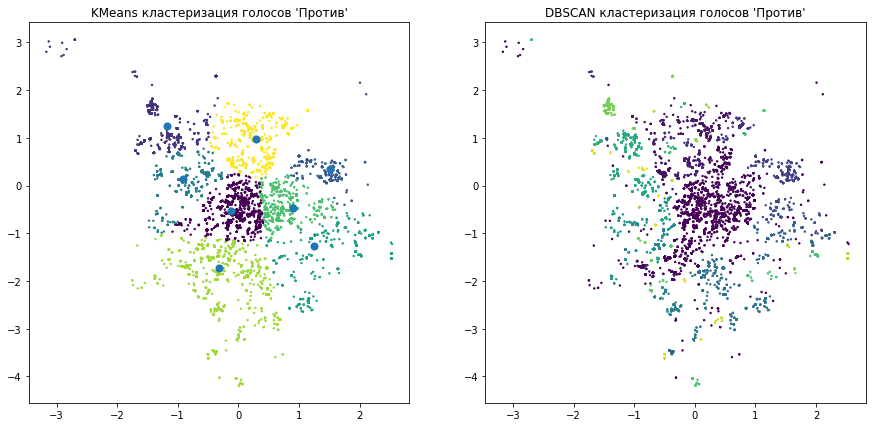

In [113]:
X = StandardScaler().fit_transform(data[data.comment_class == -1][['x','y']])
als = [KMeans,  DBSCAN]
l = len(als)
fig, axes = plt.subplots(1,l, figsize = [15, int(15 / l)])
for i in range(l):
    try:
        model = als[i](eps = 0.1)
    except:
        model = als[i]()
    y_pred = model.fit_predict(X)  
    axes[i].scatter(X[:,0], X[:,1], c=y_pred, s=2)
    axes[i].set_title(model.__class__.__name__ + " кластеризация голосов 'Против'")
    try:
        centers = model.cluster_centers_
        axes[i].scatter(centers[:, 0], centers[:, 1], s=50)
    except:
        _

* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*

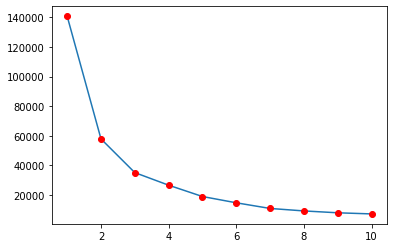

In [104]:
X = StandardScaler().fit_transform(data[['x','y']])
k_inertia = []
ks = range(1,11)
for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X, )
    k_inertia.append(clf_kmeans.inertia_)
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [106]:
k_d = np.diff(k_inertia)
d_r = k_d[1:] / k_d[:-1]
k_opt = ks[np.argmin(d_r)+1]
k_opt

2

Text(0.5, 1.0, "KMeans с 'оптимальным' количеством кластеров")

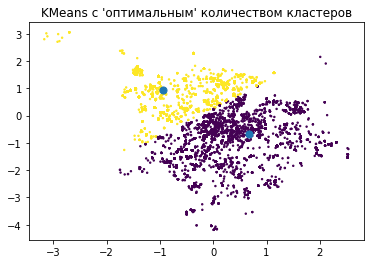

In [115]:
model = KMeans(n_clusters = k_opt)
y_pred = model.fit_predict(X)  
plt.scatter(X[:,0], X[:,1], c=y_pred, s=2)
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=50)
plt.title(model.__class__.__name__ + " с 'оптимальным' количеством кластеров")

* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*

Text(0.5, 1.0, 'DBSCAN')

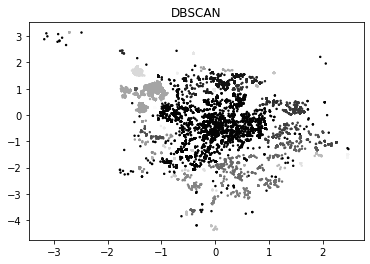

In [103]:
X = StandardScaler().fit_transform(data[['x','y']])

model = DBSCAN(eps = 0.1,n_jobs = -1)
y_pred = model.fit_predict(X)  
plt.scatter(X[:,0], X[:,1], c=y_pred, s=2, cmap='gray')
plt.title(model.__class__.__name__)
    